In [13]:
%matplotlib inline
import cv2
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab
pylab.rcParams['figure.figsize'] = (10.0, 8.0)

In [3]:
dataDir='/media/greghovhannisyan/BackupData1/mscoco'
dataType='train2017'
annFile='%s/annotations/instances/instances_%s.json'%(dataDir,dataType)

In [4]:
# initialize COCO api for instance annotations
coco=COCO(annFile)

loading annotations into memory...
Done (t=15.65s)
creating index...
index created!


In [43]:
catIds = coco.getCatIds(catNms=['person','dog','skateboard']);
imgIds = coco.getImgIds(catIds=catIds );
img = coco.loadImgs(imgIds[np.random.randint(0,len(imgIds))])[0]

In [44]:
img_folder = '/images/train2017/'
img_id = img['id']

In [45]:
annIds = coco.getAnnIds(imgIds=img_id, catIds=catIds, iscrowd=None)
anns = coco.loadAnns(annIds)

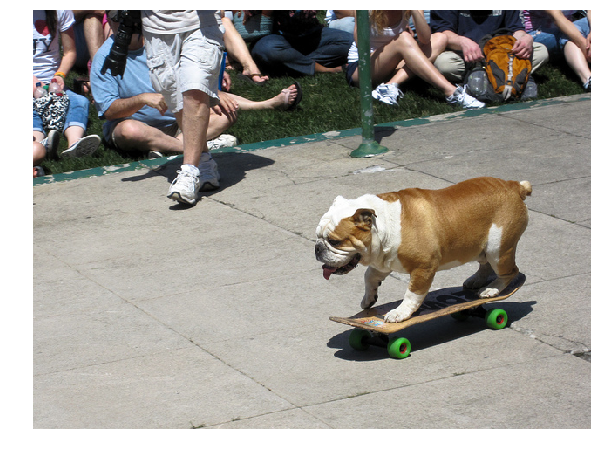

(480, 640, 3)


In [46]:
# load and display instance annotations
img_folder = '/images/train2017/'
img_id = img['id']
I = io.imread(dataDir + img_folder + '000000' + str(img_id) + '.jpg')
fig = plt.figure(); plt.axis('off')
plt.imshow(I[:, :, :])
plt.show()
print(I.shape)

172310
[[337.06, 230.0, 338.03, 227.1, 340.93, 223.24, 343.82, 218.41, 348.65, 213.58, 353.48, 210.68, 357.34, 215.51, 363.14, 217.44, 367.97, 215.51, 379.56, 212.61, 383.42, 211.65, 397.91, 209.72, 409.5, 209.72, 418.19, 207.78, 428.81, 206.82, 440.4, 206.82, 450.06, 205.85, 467.44, 206.82, 476.14, 204.89, 499.32, 199.09, 533.12, 190.4, 542.78, 193.3, 554.37, 196.19, 560.16, 196.19, 566.92, 200.06, 573.68, 209.72, 565.96, 214.54, 564.02, 223.24, 567.89, 237.72, 564.02, 254.14, 560.16, 260.9, 554.37, 267.66, 552.43, 276.36, 554.37, 293.74, 556.3, 295.67, 554.37, 308.23, 536.98, 318.85, 526.36, 324.65, 516.7, 327.54, 496.42, 327.54, 494.49, 322.71, 494.49, 315.95, 497.38, 308.23, 512.84, 296.64, 513.8, 290.84, 509.94, 289.88, 495.45, 291.81, 479.03, 294.71, 459.72, 298.57, 458.75, 308.23, 438.47, 343.0, 433.64, 352.65, 416.26, 358.45, 399.84, 356.52, 398.87, 354.58, 409.5, 347.82, 417.22, 338.17, 423.02, 332.37, 426.88, 326.58, 431.71, 314.02, 432.68, 302.43, 428.81, 303.4, 416.26, 304.

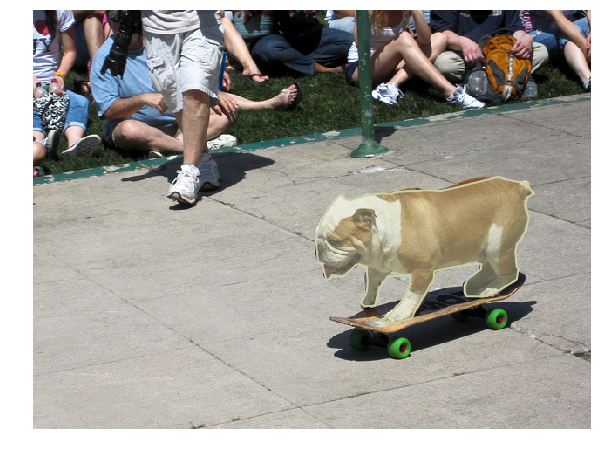

In [47]:
# load and display instance annotations
plt.imshow(I); plt.axis('off')
print(img['id'])
annIds = coco.getAnnIds(img_id, catIds=catIds, iscrowd=None)
anns = coco.loadAnns(annIds)

custom_poly = [0, 0, 700, 0, 700, 700, 0, 700]
custom_l = list()
custom_l.append(custom_poly)

# BINGO
temp_list = list()
temp_list.append(anns[0])
print(temp_list[0]['segmentation'])
#print(temp_list['segmentation']['counts'])
#temp_list[0]['segmentation'] = custom_l
coco.showAnns(temp_list)
#print(type(temp_list[0]['segmentation'][0]))
#plt.savefig('test')

In [85]:
#(480, 640, 3)
a = cv2.imread(dataDir + img_folder + '000000' + str(img_id) + '.jpg')
print(dataDir + img_folder + '000000' + str(img_id) + '.jpg')
print(anns[0])
b = coco.annToMask(anns[0])
res = cv2.bitwise_and(a,a,mask = b)
print(res.shape)

/media/greghovhannisyan/BackupData1/mscoco/images/train2017/000000172310.jpg
{'bbox': [323.54, 190.4, 250.14, 168.05], 'image_id': 172310, 'iscrowd': 0, 'category_id': 18, 'area': 25059.38285000001, 'segmentation': [[337.06, 230.0, 338.03, 227.1, 340.93, 223.24, 343.82, 218.41, 348.65, 213.58, 353.48, 210.68, 357.34, 215.51, 363.14, 217.44, 367.97, 215.51, 379.56, 212.61, 383.42, 211.65, 397.91, 209.72, 409.5, 209.72, 418.19, 207.78, 428.81, 206.82, 440.4, 206.82, 450.06, 205.85, 467.44, 206.82, 476.14, 204.89, 499.32, 199.09, 533.12, 190.4, 542.78, 193.3, 554.37, 196.19, 560.16, 196.19, 566.92, 200.06, 573.68, 209.72, 565.96, 214.54, 564.02, 223.24, 567.89, 237.72, 564.02, 254.14, 560.16, 260.9, 554.37, 267.66, 552.43, 276.36, 554.37, 293.74, 556.3, 295.67, 554.37, 308.23, 536.98, 318.85, 526.36, 324.65, 516.7, 327.54, 496.42, 327.54, 494.49, 322.71, 494.49, 315.95, 497.38, 308.23, 512.84, 296.64, 513.8, 290.84, 509.94, 289.88, 495.45, 291.81, 479.03, 294.71, 459.72, 298.57, 458.75, 3

In [81]:
cv2.imshow('img', res)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [67]:
# get first masked value (foreground)
fg = cv2.bitwise_or(a, a, mask=b)

# get second masked value (background) mask must be inverted
mask = cv2.bitwise_not(b)

background = np.full(a.shape, 255, dtype=np.uint8)
bk = cv2.bitwise_or(background, background, mask=b)

# combine foreground+background
final = cv2.bitwise_or(fg, bk)

print(np.unique(mask))

cv2.imshow('img', final)
cv2.waitKey(0)
cv2.destroyAllWindows()

[254 255]


In [70]:
#print(temp_list[0]['image_id'])
mask_as_arr = coco.annToMask(anns[0])
#mask_as_arr = coco.annToMask(temp_list[0])
#np.sum(coco.annToMask(temp_list[0]))

[0 1]


/usr/local/lib/python3.5/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:77: UserWarning: Low image data range; displaying image with stretched contrast.
  warn("Low image data range; displaying image with "


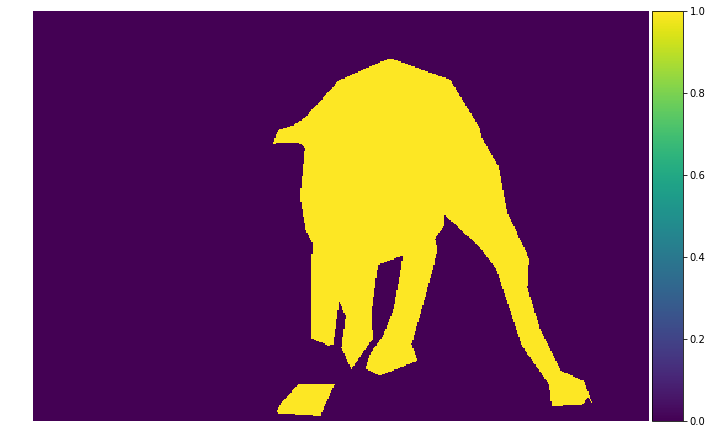

In [149]:
plt.imshow(I, cmap='gray')
plt.axis('off')
a = plt.imshow(mask_as_arr, cmap='tab20c', alpha=0.5).get_array()
plt.savefig('test')
print(np.unique(a))
io.imshow(a)

In [1]:
from PIL import Image

img = Image.fromarray(coco.annToMask(temp_list[0]), '1')
img.save('my.jpg')
img.show()

NameError: name 'coco' is not defined